In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Ellipse
from uslf_weights import uslf_weights

# NeSH

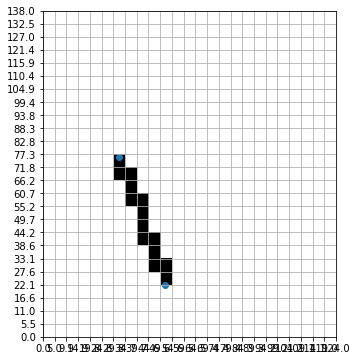

In [2]:
Nx = 25
Ny = 25
xmax = 124
ymax = 138

my_weights_NeSh = uslf_weights(Nx, Ny, xmax, ymax)

pa = np.array([np.random.rand()*xmax*(3/4), np.random.rand()*ymax*(3/4)])
pb = np.array([np.random.rand()*xmax*(3/4), np.random.rand()*ymax*(3/4)])

xcg, ycg, xe, ye = my_weights_NeSh.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

my_weights_NeSh.plot_line_supercover(xe, ye, figsize=(10,6),start_p=pa, stop_p=pb)

# NeSh multiple line segments

In [8]:
Nx = 30
Ny = 30

xmax = 124
ymax = 138

my_weights_NeSh_mult = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_NeSh_mult.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.random.rand(10,2)*100
pb = np.random.rand(10,2)*100

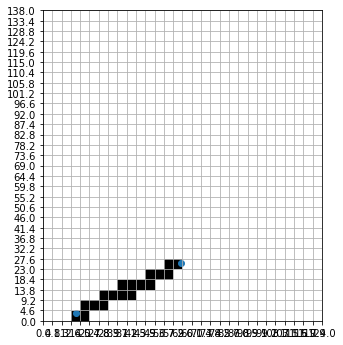

In [12]:
output_matrix = my_weights_NeSh_mult.fill_matrix_apm_1(xe, ye, pa, pb)

line = np.random.randint(0, pa.shape[0]-1)
apm_1 = np.reshape(output_matrix[line, :], (Ny, Nx))
_ = my_weights_NeSh_mult.plot_apm(pa[line, :], pb[line, :], xe, ye, apm_1, figsz=(5,20))

# NEM one line segment

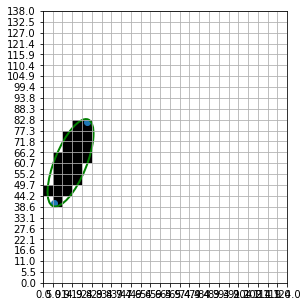

In [16]:
Nx = 25
Ny = 25
xmax = 124
ymax = 138

my_weights_NEM = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_NEM.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.array([np.random.rand()*xmax*(3/4), np.random.rand()*ymax*(3/4)])
pb = np.array([np.random.rand()*xmax*(3/4), np.random.rand()*ymax*(3/4)])

out_mat, gell = my_weights_NEM.fill_matrix_apm_2(xcg, ycg, 20, pa, pb)

ax = my_weights_NEM.plot_apm(pa, pb, xe, ye, out_mat)
ax.add_patch(gell)
plt.show()

# NEM with multiple line segments

In [17]:
Nx = 20
Ny = 20

xmax = 124
ymax = 138

my_weights_NEM_mult = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_NEM_mult.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.random.rand(10,2)*100
pb = np.random.rand(10,2)*100

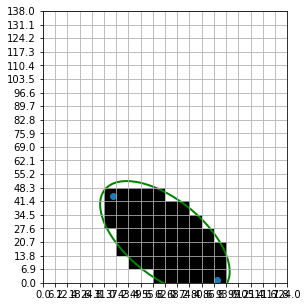

In [21]:
out_mat, gell = my_weights_NEM_mult.fill_matrix_apm_2(xcg, ycg, 30, pa, pb, save_ell_plot=True)

line = np.random.randint(0, pa.shape[0]-1)
apm_2 = np.reshape(out_mat[line, :], (Ny, Nx))
ax = my_weights_NEM_mult.plot_apm(pa[line, :], pb[line, :], xe, ye, apm_2)
ax.add_patch(gell[line])
plt.show()

# IAEM with one line segment

In [ ]:
Nx = 30
Ny = 30
xmax = 124
ymax = 138

my_weights_IAEM = uslf_weights(Nx, Ny, xmax, ymax)

xcg, ycg, xe, ye = my_weights_IAEM.scenario_grid(mat_grid_as_scenario=False, return_edges=True)

pa = np.array([np.random.rand()*xmax*(5/6), np.random.rand()*ymax*(5/6)])
pb = np.array([np.random.rand()*xmax*(5/6), np.random.rand()*ymax*(5/6)])

out_mat, gell = my_weights_IAEM.fill_matrix_apm_3(xcg, ycg, 20, pa, pb, verbose=True)

In [ ]:
'''

The entries of the APM for the IAEM have different orders of magnitude.
The quantiles show this 

'''

f, c = np.nonzero(out_mat)
nz_outmat = [out_mat[i[0], i[1]] for i in zip(f, c)]
print(np.log(nz_outmat))
print(np.quantile(nz_outmat, (0.5, 0.9, 0.95, 0.99)))

In [ ]:
# Scale the output matrix for ploting purposes
min_val = np.min(out_mat[np.nonzero(out_mat)])


ax = my_weights_IAEM.plot_apm(pa, pb,xe, ye, np.log(out_mat/min_val), cmp='Greys')
ax.add_patch(gell)
plt.show()